# Exploring and Transforming JSON Schemas - Lab

# Introduction

In this lab, you'll practice exploring a JSON file whose structure and schema is unknown to you. We will provide you with limited information, and you will explore the dataset to answer the specified question.

## Objectives

You will be able to:

* Use the `json` module to load and parse JSON documents
* Explore and extract data using unknown JSON schemas
* Convert JSON to a pandas dataframe

## Your Task: Create a Bar Graph of the Top 10 States with the Highest Asthma Rates for Adults Age 18+

The information you need to create this graph is located in `disease_data.json`. It contains both data and metadata.

You are given the following codebook/data dictionary:

* The actual data values are associated with the key `'DataValue'`
* The state names are associated with the key `'LocationDesc'`
* To filter to the appropriate records, make sure:
  * The `'Question'` is `'Current asthma prevalence among adults aged >= 18 years'`
  * The `'StratificationCategoryID1'` is `'OVERALL'`
  * The `'DataValueTypeID'` is `'CRDPREV'`
  * The `'LocationDesc'` is not `'United States'`
  
The provided JSON file contains both data and metadata, and you will need to parse the metadata in order to understand the meanings of the values in the data.

No further information about the structure of this file is provided.

## Load the JSON File

Load the data from the file `disease_data.json` into a variable `data`.

In [1]:
# Your code here 
import json
with open('disease_data.json') as f:
    data = json.load(f)

## Explore the Overall Structure

What is the overall data type of `data`?

In [2]:
# Your code here
type(data)


dict

What are the keys?

In [4]:
# Your code here
data.keys()

dict_keys(['meta', 'data'])

What are the data types associates with those keys?

In [5]:
# Your code here (data)
type(data['meta'])

dict

In [6]:
# Your code here (metadata)
type(data['data'])

list

Perform additional exploration to understand the contents of these values. For dictionaries, what are their keys? For lists, what is the length, and what does the first element look like?

In [7]:
# Your code here (add additional cells as needed)
print("Length of data list:", len(data['data']))
print("First element of data list:")
print(data['data'][0])

Length of data list: 60266
First element of data list:
[1, 'FF49C41F-CE8D-46C4-9164-653B1227CF6F', 1, 1527194521, '959778', 1527194521, '959778', None, '2016', '2016', 'US', 'United States', 'BRFSS', 'Alcohol', 'Binge drinking prevalence among adults aged >= 18 years', None, '%', 'Crude Prevalence', '16.9', '16.9', '*', '50 States + DC: US Median', '16', '18', 'Overall', 'Overall', None, None, None, None, [None, None, None, None, None], None, '59', 'ALC', 'ALC2_2', 'CRDPREV', 'OVERALL', 'OVR', None, None, None, None]


In [8]:
data['meta']['view'].keys()

dict_keys(['id', 'name', 'attribution', 'attributionLink', 'averageRating', 'category', 'createdAt', 'description', 'displayType', 'downloadCount', 'hideFromCatalog', 'hideFromDataJson', 'indexUpdatedAt', 'licenseId', 'newBackend', 'numberOfComments', 'oid', 'provenance', 'publicationAppendEnabled', 'publicationDate', 'publicationGroup', 'publicationStage', 'rowClass', 'rowsUpdatedAt', 'rowsUpdatedBy', 'tableId', 'totalTimesRated', 'viewCount', 'viewLastModified', 'viewType', 'columns', 'grants', 'license', 'metadata', 'owner', 'query', 'rights', 'tableAuthor', 'tags', 'flags'])

As you likely identified, we have a list of lists forming the `'data'`. In order to make sense of that list of lists, we need to find the meaning of each index, i.e. the names of the columns.

## Identify the Column Names

Look through the metadata to find the *names* of the columns, and assign that variable to `column_names`. This should be a list of strings. (If you just get the values associated with the `'columns'` key, you will have a list of dictionaries, not a list of strings.)

In [12]:
# Your code here (add additional cells as needed)
data['meta']['view']['columns'][:3]
column_names = [column['name'] for column in data['meta']['view']['columns']]
print(column_names)

['sid', 'id', 'position', 'created_at', 'created_meta', 'updated_at', 'updated_meta', 'meta', 'YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'DataSource', 'Topic', 'Question', 'Response', 'DataValueUnit', 'DataValueType', 'DataValue', 'DataValueAlt', 'DataValueFootnoteSymbol', 'DatavalueFootnote', 'LowConfidenceLimit', 'HighConfidenceLimit', 'StratificationCategory1', 'Stratification1', 'StratificationCategory2', 'Stratification2', 'StratificationCategory3', 'Stratification3', 'GeoLocation', 'ResponseID', 'LocationID', 'TopicID', 'QuestionID', 'DataValueTypeID', 'StratificationCategoryID1', 'StratificationID1', 'StratificationCategoryID2', 'StratificationID2', 'StratificationCategoryID3', 'StratificationID3']


The following code checks that you have the correct column names:

In [11]:
# Run this cell without changes

# 42 total columns
assert len(column_names) == 42

# Each name should be a string, not a dict
assert type(column_names[0]) == str and type(column_names[-1]) == str

# Check that we have some specific strings
assert "DataValue" in column_names
assert "LocationDesc" in column_names
assert "Question" in column_names
assert "StratificationCategoryID1" in column_names
assert "DataValueTypeID" in column_names

## Filter Rows Based on Columns

Recall that we only want to include records where:

* The `'Question'` is `'Current asthma prevalence among adults aged >= 18 years'`
* The `'StratificationCategoryID1'` is `'OVERALL'`
* The `'DataValueTypeID'` is `'CRDPREV'`
* The `'LocationDesc'` is not `'United States'`

Combining knowledge of the data and metadata, filter out the rows of data that are not relevant.

(You may find the `pandas` library useful here.)

In [13]:
# Your code here (add additional cells as needed)
print(data['data'][0])

[1, 'FF49C41F-CE8D-46C4-9164-653B1227CF6F', 1, 1527194521, '959778', 1527194521, '959778', None, '2016', '2016', 'US', 'United States', 'BRFSS', 'Alcohol', 'Binge drinking prevalence among adults aged >= 18 years', None, '%', 'Crude Prevalence', '16.9', '16.9', '*', '50 States + DC: US Median', '16', '18', 'Overall', 'Overall', None, None, None, None, [None, None, None, None, None], None, '59', 'ALC', 'ALC2_2', 'CRDPREV', 'OVERALL', 'OVR', None, None, None, None]


In [14]:
# Transcribing the columns we are filtering based on
question_name = "Question"
category_name = "StratificationCategoryID1"
type_name = "DataValueTypeID"
location_name = "LocationDesc"

# Transcribing the values we are filtering for
question_value = "Current asthma prevalence among adults aged >= 18 years"
category_value = "OVERALL"
type_value = "CRDPREV"
location_value = "United States"

In [15]:
# First, a solution without pandas

# Locate indices of relevant columns
question_index = column_names.index(question_name)
category_index = column_names.index(category_name)
type_index = column_names.index(type_name)
location_index = column_names.index(location_name)

relevant_records_without_pandas = []
for record in data['data']:
    # Note most are == except for location, which specified NOT
    if record[question_index] == question_value and \
        record[category_index] == category_value and \
        record[type_index] == type_value and \
        record[location_index] != location_value:
            relevant_records_without_pandas.append(record)

# Information about the results
print(len(relevant_records_without_pandas), "relevant records found")
print("First record:")
print(relevant_records_without_pandas[0])

54 relevant records found
First record:
[9369, '6BEC61D0-E04B-44BA-8170-F7D6A4C40A09', 9369, 1527194523, '959778', 1527194523, '959778', None, '2016', '2016', 'AL', 'Alabama', 'BRFSS', 'Asthma', 'Current asthma prevalence among adults aged >= 18 years', None, '%', 'Crude Prevalence', '9.7', '9.7', None, None, '8.8', '10.7', 'Overall', 'Overall', None, None, None, None, [None, '32.84057112200048', '-86.63186076199969', None, False], None, '01', 'AST', 'AST1_1', 'CRDPREV', 'OVERALL', 'OVR', None, None, None, None]


In [20]:
# Filtering the dataframe based on the criteria

relevant_records_with_pandas = df[
    (df[question_name] == question_value) &
    (df[category_name] == category_value) &
    (df[type_name] == type_value) &
    (df[location_name] != location_value)
]

relevant_records_with_pandas

NameError: name 'df' is not defined

You should have 54 records after filtering.

## Extract the Attributes Required for Plotting

For each record, the only information we actually need for the graph is the `'DataValue'` and `'LocationDesc'`. Create a list of records that only contains these two attributes.

Also, make sure that the data values are numbers, not strings.

In [16]:
# Your code here (create additional cells as needed)
# Locate indices of relevant columns
question_index = column_names.index(question_name)
category_index = column_names.index(category_name)
type_index = column_names.index(type_name)
location_index = column_names.index(location_name)

relevant_records_without_pandas = []
for record in data['data']:
    # Note most are == except for location, which specified NOT
    if record[question_index] == question_value and \
        record[category_index] == category_value and \
        record[type_index] == type_value and \
        record[location_index] != location_value:
            relevant_records_without_pandas.append(record)

# Information about the results
print(len(relevant_records_without_pandas), "relevant records found")
print("First record:")
print(relevant_records_without_pandas[0])

54 relevant records found
First record:
[9369, '6BEC61D0-E04B-44BA-8170-F7D6A4C40A09', 9369, 1527194523, '959778', 1527194523, '959778', None, '2016', '2016', 'AL', 'Alabama', 'BRFSS', 'Asthma', 'Current asthma prevalence among adults aged >= 18 years', None, '%', 'Crude Prevalence', '9.7', '9.7', None, None, '8.8', '10.7', 'Overall', 'Overall', None, None, None, None, [None, '32.84057112200048', '-86.63186076199969', None, False], None, '01', 'AST', 'AST1_1', 'CRDPREV', 'OVERALL', 'OVR', None, None, None, None]


In [19]:
# First, a solution without pandas


data_and_location_with_pandas = relevant_records_with_pandas[["DataValue", "LocationDesc"]].copy()
data_and_location_with_pandas["DataValue"] = data_and_location_with_pandas["DataValue"].apply(float)
data_and_location_with_pandas

NameError: name 'relevant_records_with_pandas' is not defined

## Find Top 10 States

Sort by `'DataValue'` and limit to the first 10 records.

In [18]:
# Your code here (add additional cells as needed)
# Without pandas
top_10_without_pandas = sorted(data_and_location_without_pandas, key=lambda x: x[0], reverse=True)[:10]
top_10_without_pandas

NameError: name 'data_and_location_without_pandas' is not defined

## Separate the Names and Values for Plotting

Assign the names of the top 10 states to a list-like variable `names`, and the associated values to a list-like variable `values`. Then the plotting code below should work correctly to make the desired bar graph.

In [22]:
# Replace None with appropriate code

names = None
values = None

TypeError: 'NoneType' object is not subscriptable

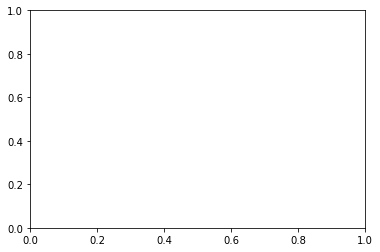

In [23]:
# Run this cell without changes

import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax.barh(names[::-1], values[::-1]) # Values inverted so highest is at top
ax.set_title('Adult Asthma Rates by State in 2016')
ax.set_xlabel('Percent 18+ with Asthma');

## Summary

In this lab you got some extended practice exploring the structure of JSON files and visualizing data.